Initial game setup. All game logic is in SNAPT_Game.py

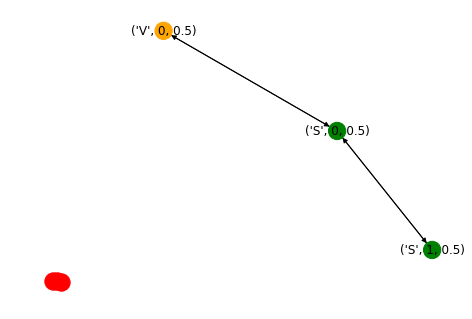

20 20 0


In [8]:
from SNAPT_Game import SNAPT_Game as SNAPT

weights = [[1, 1, 0],
         [1, 1, 1],
         [0, 1, 1]]

machine_attributes = [[1, 0, 0.5, 0, 0],
          [0, 0, 0.5, 0, 0],
          [0, 1, 0.5, 0, 0]]

p1_attributes = [1, 1, 1, 20, 1]
p2_attributes = [1, 1, 1, 20, 1]

g = SNAPT(weights, machine_attributes, p1_attributes, p2_attributes)
board, player = g.getInitBoard()
g.render(board, player)

Below is the training procedure for AlphaZero and AlphaZero-ES.
- The first cell is imports and the hyperparameters
- Second cell is actual training

AlphaZero code is modified from  

https://github.com/suragnair/alpha-zero-general

For original AlphaZero paper, see  

https://arxiv.org/abs/1712.01815



In [9]:
from SNAPT_AZ import *
from SNAPT_net import NNetWrapper as nn
import time

args = dotdict({
    'numEps': 5,        # Number of complete self-play games to simulate during a new iteration.
    'numMCTSSims': 20,  # Number of games moves for MCTS to simulate.
    'cpuct': 1,         # hyperparameter for MCTS
    'batch_size' : 8,  # number of samples to take for AZ-ES, N in paper
    'elite_size' : 4,  # elite size for AZ-ES, K in paper
})

In [11]:
def train_AZ(g, nnet, use_gradient = True, t_max = 3600):
    """
    training method for AlphaZero and AlphaZero-ES
    g: Game to train on 
    nnet: neural network to train
    grad: If true, train with gradient/traditional AZ, otherwise use AlphaZero-ES
    t_max: total training time, 3600 in paper
    """
    
    # set up neural network, MCTS, and AlphaZero objects
    mcts = MCTS(g, nnet, args)
    AZ = AlphaZero(g, nnet, mcts, args)

    # training loop
    start = time.time()
    iterations = 0
    
    while (time.time() - start) < t_max:
        iterations += 1
        if use_gradient:
            AZ.train_gradient()
        else:
            AZ.train_es()

    # print number of iterations and total training time
    print(iterations)
    print(time.time() - start)


    # save attack and defense neural networks
    # they will be stored in folder 'checkpoint'
    # don't overwrite what is already there unless you want to train new models
    nnet.save_checkpoint(att_filename = 'att_temp.pth.tar', def_filename = 'def_temp.pth.tar')

nnet = nn(g)
#train_AZ(g, nnet, use_gradient = True, t_max = 10)

ES methods  

Parameters (except for training time) are same as in paper  
episode_count is G = 50  
batch_size is N = 8  
elite_size is K = 4  

- first cell is imports
- second cell is (1+1)-ES
- third cell is CEM

models are saved to folder 'checkpoint'

In [13]:
from SNAPT_es import *
import os

# training time
t_max = 10

In [14]:
attacker_mu, defender_mu = oneone(g, iters = 100000000, episode_count = 50, temp = 1, t_max = t_max)

attacker_fname= os.path.join('checkpoint', 'att_temp.pth.tar')
torch.save(attacker_mu.state_dict(), attacker_fname)

defender_fname= os.path.join('checkpoint', 'def_temp.pth.tar')
torch.save(defender_mu.state_dict(), defender_fname)

Finished in 20.0 seconds and 2 iterations


In [15]:
attacker_mu, defender_mu = cem(g, iters = 100000, batch_size = 8, elite_size = 4, episode_count = 50, weight_type = 'log', temp = 1, t_max = t_max)

attacker_fname = os.path.join('checkpoint', 'att_temp.pth.tar')
torch.save(attacker_mu.state_dict(), attacker_fname)

defender_fname = os.path.join('checkpoint', 'def_temp.pth.tar')
torch.save(defender_mu.state_dict(), defender_fname)

Finished in 49.0 seconds and 1 iterations


In [16]:
from SNAPT_a2c import *
import os

In [17]:
attacker_ac, defender_ac = a2c(g, iters = 20000, t_max = 10)

attacker_fname = os.path.join('checkpoint', 'att_temp.pth.tar')
torch.save(attacker_ac.state_dict(), attacker_fname)

defender_fname = os.path.join('checkpoint', 'def_temp.pth.tar')
torch.save(defender_ac.state_dict(), defender_fname)

Finished in 10.0 seconds and 58 iterations
